In [3]:
import networkx as nx

In [11]:
G_starWars = '/content/star-wars-iv-data.py'

# The original dataset is from:
# Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479
# Simplified by Federico Albanese.

In [13]:
characters = ["R2-D2",
                "CHEWBACCA",
                "C-3PO",
                "LUKE",
                "DARTH VADER",
                "CAMIE",
                "BIGGS",
                "LEIA",
                "BERU",
                "OWEN",
                "OBI-WAN",
                "MOTTI",
                "TARKIN",
                "HAN",
                "DODONNA",
                "GOLD LEADER",
                "WEDGE",
                "RED LEADER",
                "RED TEN"]


edges = [("CHEWBACCA", "R2-D2"),
        ("C-3PO", "R2-D2"),
        ("BERU", "R2-D2"),
        ("LUKE", "R2-D2"),
        ("OWEN", "R2-D2"),
        ("OBI-WAN", "R2-D2"),
        ("LEIA", "R2-D2"),
        ("BIGGS", "R2-D2"),
        ("HAN", "R2-D2"),
        ("CHEWBACCA", "OBI-WAN"),
        ("C-3PO", "CHEWBACCA"),
        ("CHEWBACCA", "LUKE"),
        ("CHEWBACCA", "HAN"),
        ("CHEWBACCA", "LEIA"),
        ("CAMIE", "LUKE"),
        ("BIGGS", "CAMIE"),
        ("BIGGS", "LUKE"),
        ("DARTH VADER", "LEIA"),
        ("BERU", "LUKE"),
        ("BERU", "OWEN"),
        ("BERU", "C-3PO"),
        ("LUKE", "OWEN"),
        ("C-3PO", "LUKE"),
        ("C-3PO", "OWEN"),
        ("C-3PO", "LEIA"),
        ("LEIA", "LUKE"),
        ("BERU", "LEIA"),
        ("LUKE", "OBI-WAN"),
        ("C-3PO", "OBI-WAN"),
        ("LEIA", "OBI-WAN"),
        ("MOTTI", "TARKIN"),
        ("DARTH VADER", "MOTTI"),
        ("DARTH VADER", "TARKIN"),
        ("HAN", "OBI-WAN"),
        ("HAN", "LUKE"),
        ("C-3PO", "HAN"),
        ("LEIA", "MOTTI"),
        ("LEIA", "TARKIN"),
        ("HAN", "LEIA"),
        ("DARTH VADER", "OBI-WAN"),
        ("DODONNA", "GOLD LEADER"),
        ("DODONNA", "WEDGE"),
        ("DODONNA", "LUKE"),
        ("GOLD LEADER", "WEDGE"),
        ("GOLD LEADER", "LUKE"),
        ("LUKE", "WEDGE"),
        ("BIGGS", "LEIA"),
        ("LEIA", "RED LEADER"),
        ("LUKE", "RED LEADER"),
        ("BIGGS", "RED LEADER"),
        ("BIGGS", "C-3PO"),
        ("C-3PO", "RED LEADER"),
        ("RED LEADER", "WEDGE"),
        ("GOLD LEADER", "RED LEADER"),
        ("BIGGS", "WEDGE"),
        ("RED LEADER", "RED TEN"),
        ("BIGGS", "GOLD LEADER"),
        ("LUKE", "RED TEN")]

G_starWars = nx.Graph()


G_starWars.add_nodes_from(characters)
G_starWars.add_edges_from(edges)

# **visualize the data**

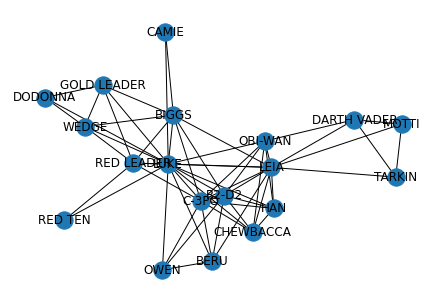

In [14]:
nx.draw(G_starWars, with_labels = True)

# **circular_layout**

The placement of a node does not depend on its significance in this arrangement; all nodes are equally represented. (The circular structure could also aid in visualizing distinct connected components, such as subgraphs with a path connecting any two nodes, but in this case, the entire graph is one large connected component.)

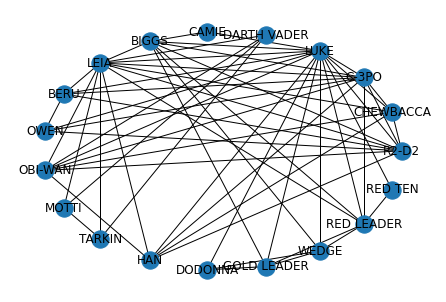

In [15]:
pos = nx.circular_layout(G_starWars)
nx.draw(G_starWars, pos=pos, with_labels = True)

Visualizing the graph with a specific layout can give us some interesting qualitative results. Still, quantitative results are a vital part of any data science analysis, so we’ll need to define some metrics.

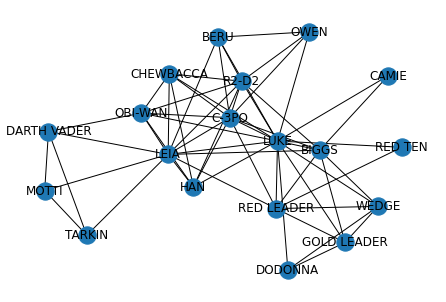

In [16]:
nx.draw_kamada_kawai(G_starWars, with_labels = True)

# **Node Analysis: Degree and PageRank**

It could be interesting for us to characterize the nodes now that we can plainly see our network. The traits of the nodes, and in our case, the characters, are described by a number of metrics.

A node's degree, or the number of edges it possesses, is one fundamental metric. How many other characters a Star Wars character appeared in a scene with is indicated by the node's degree.

The degree of a character or the complete network can be determined using the degree() function:

In [17]:
print(G_starWars.degree["LUKE"])
print(G_starWars.degree)

15
[('R2-D2', 9), ('CHEWBACCA', 6), ('C-3PO', 10), ('LUKE', 15), ('DARTH VADER', 4), ('CAMIE', 2), ('BIGGS', 8), ('LEIA', 12), ('BERU', 5), ('OWEN', 4), ('OBI-WAN', 7), ('MOTTI', 3), ('TARKIN', 3), ('HAN', 6), ('DODONNA', 3), ('GOLD LEADER', 5), ('WEDGE', 5), ('RED LEADER', 7), ('RED TEN', 2)]


A single line of code can be used to order nodes according to degree from highest to lowest:

In [18]:
print(sorted(G_starWars.degree, key=lambda x: x[1], reverse=True))

[('LUKE', 15), ('LEIA', 12), ('C-3PO', 10), ('R2-D2', 9), ('BIGGS', 8), ('OBI-WAN', 7), ('RED LEADER', 7), ('CHEWBACCA', 6), ('HAN', 6), ('BERU', 5), ('GOLD LEADER', 5), ('WEDGE', 5), ('DARTH VADER', 4), ('OWEN', 4), ('MOTTI', 3), ('TARKIN', 3), ('DODONNA', 3), ('CAMIE', 2), ('RED TEN', 2)]


The degree is only a sum and does not account for specifics of each edge. Does a specific edge link to a node that is connected to the entire network or to a node that is otherwise isolated? This data is compiled by Google's PageRank algorithm to determine how "important" a node is in a network.

The PageRank metric can be thought of as a random entity shifting between nodes. The agent will typically visit better-connected nodes more frequently because there are more pathways that pass through them.

With the help of the NetworkX package, we can determine such nodes' higher PageRank:

In [20]:
pageranks = nx.pagerank(G_starWars) # A dictionary
print(pageranks["LUKE"])
print('This prints Luke’s rank and our characters sorted by rank:')
print(sorted(pageranks, key=lambda x: x[1], reverse=True))


0.12100659993223407
This prints Luke’s rank and our characters sorted by rank:
['OWEN', 'LUKE', 'MOTTI', 'DODONNA', 'GOLD LEADER', 'BIGGS', 'CHEWBACCA', 'LEIA', 'BERU', 'WEDGE', 'RED LEADER', 'RED TEN', 'OBI-WAN', 'DARTH VADER', 'CAMIE', 'TARKIN', 'HAN', 'R2-D2', 'C-3PO']


Luke, who had the highest degree, gets surpassed by Owen as the character with the highest PageRank. The analysis: Although Owen doesn't appear in as many scenes as other characters do, he does appear in many sequences with significant characters like Luke, R2-D2, and C-3PO.

The character with the lowest PageRank is C-3PO, who is the third-highest degree character. Despite having numerous connections, many of them are with inconsequential personalities, according to C-3PO.

The main point: Using numerous metrics helps provide a more thorough understanding of the many properties of a graph's nodes.

# **Community Detection Algorithms**

Communities—groups of nodes that are strongly connected to one another but only loosely connected to nodes outside their community—might be crucial to distinguish when examining a network.

For this, there are numerous algorithms. Since they assign labels to nodes without the necessity for them to have previously been labeled, the majority of them are found in unsupervised machine learning techniques.

The most well-known is label propagation. Each node in the network begins with a distinct label in a community of one. The majority of the labels of the nearby nodes are used to iteratively update the labels of the nodes.

As the labels spread throughout the network, every node eventually shares a label with the majority of its neighbors. Nodes that are closely related to one another end up with the same label.

This algorithm can be executed with the NetworkX library in just three lines of Python:

In [21]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G_starWars)
print([community for community in communities])

[{'OBI-WAN', 'R2-D2', 'RED TEN', 'LEIA', 'C-3PO', 'LUKE', 'BIGGS', 'CAMIE', 'DODONNA', 'WEDGE', 'BERU', 'HAN', 'RED LEADER', 'CHEWBACCA', 'GOLD LEADER', 'OWEN'}, {'DARTH VADER', 'TARKIN', 'MOTTI'}]


Each set in this list of sets is a community. Readers who have seen the film will notice that the algorithm distinguished the characters meaningfully without using any real (community) labels or metadata, perfectly distinguishing the "good guys" from the "bad guys."